# Movie genre classification 
Vadym Dudarenko 444820

In [4]:
#import necessary packagies
from bs4 import BeautifulSoup
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score,auc, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import datasets
from tensorflow.keras.preprocessing import sequence
from sklearn.datasets import fetch_20newsgroups
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense, Embedding, Conv1D, AveragePool1D, Dropout, SimpleRNN, LSTM
from tensorflow.keras.layers import Flatten
from tensorflow.keras.preprocessing import sequence
import numpy as np
import string
import re
from sklearn.metrics import precision_score, recall_score, f1_score
from keras.layers import InputLayer, Conv1D, Dense, Flatten, MaxPooling1D
from keras.models import Sequential
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras import layers
from keras import models
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.layers import Dense, Flatten, LSTM, Bidirectional, Input, Dropout, InputLayer, BatchNormalization
from tensorflow.keras import Model
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential

In [5]:
#import the dataset
df= pd.read_json("C:\\Users\\Vadym\\Desktop\\ML 2\\project\\movies_dataset_from_allmovie.json")

# DATA PREPARATION

In [730]:
#Lets see a head of our dataset
df.head(5)

,name,genre,released_at,poster,language,director,domain,duration,synopsis,trailer,average_rating,cast,crawled_at,url,_id
0,"10 Days, 10 Years: Nicaraguan Elections of 1990",Culture &amp; Society,1990-01-01,,,,https://www.allmovie.com/,0H54M,,,,,2021-05-02 20:30:28,https://www.allmovie.com/movie/10-days-10-year...,72706835-65b7-5559-9d16-73c43b2667bd
1,1-2-3 Magic: Effective Discipline for Children,Education,1990-01-01,,English,,https://www.allmovie.com/,2H0M,Presented by clinical psychiatrist Thomas Phel...,,,,2021-05-02 20:30:29,https://www.allmovie.com/movie/1-2-3-magic-eff...,81e8678a-1cf5-58d7-ae5e-1b6ae80d0835
2,10 Keys to Personal Power,Business,NaT,,,,https://www.allmovie.com/,1H4M,,,,,2021-05-02 20:30:29,https://www.allmovie.com/movie/10-keys-to-pers...,0d09f252-ca38-5e85-8d5f-a91a3f32dc4c
3,"10,000 Maniacs: Time Capsule 1982-1990",Music,1990-01-01,https://cps-static.rovicorp.com/1/avg/cov310/d...,English,,https://www.allmovie.com/,0H58M,With their thoughtful folk rock sound and lyri...,,,,2021-05-02 20:30:29,https://www.allmovie.com/movie/10000-maniacs-t...,5b8e0dbb-3b48-5600-a544-651f9020245d
4,10 Rillington Place,"Crime, Drama",1971-02-10,https://cps-static.rovicorp.com/2/Open/Sony%20...,English,Richard Fleischer,https://www.allmovie.com/,1H51M,10 Rillington Place is the true story of Briti...,https://video.internetvideoarchive.net/video.m...,8.1,"10 Rillington Place, Richard Attenborough, Jud...",2021-05-02 20:30:29,https://www.allmovie.com/movie/10-rillington-p...,2b5d82ef-2429-52fb-b5ab-ffbd7ede3c3b


In [731]:
#Drop unnecessary columns
df.drop(['poster', 'released_at', 'language', 'domain', 'duration', 'trailer', 'average_rating' , 'cast',
          'crawled_at', 'url', '_id', 'director'],  axis=1, inplace = True)

In [732]:
#lets calculate number of letters in each synopsis 
df['length']=df['synopsis'].apply(len)

In [733]:
df.genre.value_counts()

Drama                                       991
Music                                       863
Comedy                                      657
Sports &amp; Recreation                     501
History                                     463
                                           ... 
Action, Horror, Science Fiction, Western      1
Dance, Musical, Mystery                       1
Drama, Romance, Western                       1
Fantasy, Adventure                            1
Romance, Comedy Drama                         1
Name: genre, Length: 590, dtype: int64

<AxesSubplot:ylabel='Frequency'>

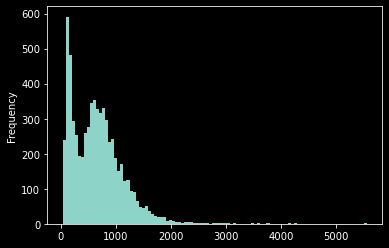

In [808]:
df['length'].plot(bins=100, kind='hist')

<AxesSubplot:xlabel='genre', ylabel='count'>

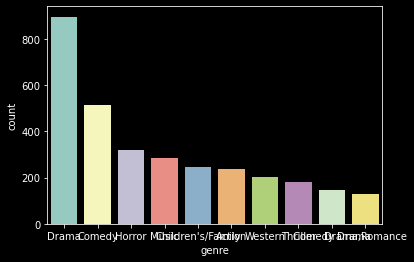

In [810]:
sns.countplot(x='genre', data=df, order=pd.value_counts(df['genre']).iloc[:10].index) 

In [734]:
#replaceing 0 values with Nan
df.replace(0, np.nan, inplace=True)
df

,name,genre,synopsis,length
0,"10 Days, 10 Years: Nicaraguan Elections of 1990",Culture &amp; Society,,NaN
1,1-2-3 Magic: Effective Discipline for Children,Education,Presented by clinical psychiatrist Thomas Phel...,367.0
2,10 Keys to Personal Power,Business,,NaN
3,"10,000 Maniacs: Time Capsule 1982-1990",Music,With their thoughtful folk rock sound and lyri...,638.0
4,10 Rillington Place,"Crime, Drama",10 Rillington Place is the true story of Briti...,597.0
...,...,...,...,...
10519,Feud of the West,"Action, Adventure, Western",Neither the best nor worst of Hoot Gibson's we...,720.0
10520,Feud of the Trail,"Action, Western",Produced back-to-back with Mystery Range (1937...,876.0
10521,Fever,Mystery,Here's the &quot;dramatis personae&quot; of Th...,505.0
10522,Fever,Thriller,"In this violent made-for cable actioner, a pai...",169.0


In [735]:
#Drop all rows with Nan values 
df.dropna(inplace=True)

In [736]:
df

,name,genre,synopsis,length
1,1-2-3 Magic: Effective Discipline for Children,Education,Presented by clinical psychiatrist Thomas Phel...,367.0
3,"10,000 Maniacs: Time Capsule 1982-1990",Music,With their thoughtful folk rock sound and lyri...,638.0
4,10 Rillington Place,"Crime, Drama",10 Rillington Place is the true story of Briti...,597.0
5,10 Violent Women,"Action, Crime",This women's prison drama from exploitation fi...,570.0
6,10,Comedy,Blake Edwards' 10 stars Dudley Moore as George...,783.0
...,...,...,...,...
10519,Feud of the West,"Action, Adventure, Western",Neither the best nor worst of Hoot Gibson's we...,720.0
10520,Feud of the Trail,"Action, Western",Produced back-to-back with Mystery Range (1937...,876.0
10521,Fever,Mystery,Here's the &quot;dramatis personae&quot; of Th...,505.0
10522,Fever,Thriller,"In this violent made-for cable actioner, a pai...",169.0


In [737]:
#cleaning our synopsis(description). Remove all stop-words
def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase
stopwords= set(['br', 'the', 'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"])

In [738]:
#cleaning the data in the description
from tqdm import tqdm
preprocessed_synopsis = []
# tqdm is for printing the status bar
for sentance in df['synopsis'].values:
    sentance = re.sub(r"http\S+", "", sentance)
    sentance = BeautifulSoup(sentance, 'lxml').get_text()
    sentance = decontracted(sentance)
    sentance = re.sub("\S*\d\S*", "", sentance).strip()
    sentance = re.sub('[^A-Za-z]+', ' ', sentance)
    sentance = ' '.join(e.lower() for e in sentance.split() if e.lower() not in stopwords)
    preprocessed_synopsis.append(sentance.strip())
df['preprocessed_plots']=preprocessed_synopsis

In [739]:
#removing spaces in the genre column
def remove_spaces(x):
    x=x.split(",")
    nospace=[]
    for item in x:
        item=item.lstrip()
        nospace.append(item)
    return (",").join(nospace)

df['genre']=df['genre'].apply(remove_spaces)
df['genre']

1                       Education
3                           Music
4                     Crime,Drama
5                    Action,Crime
6                          Comedy
                   ...           
10519    Action,Adventure,Western
10520              Action,Western
10521                     Mystery
10522                    Thriller
10523                       Drama
Name: genre, Length: 6604, dtype: object

In [740]:
#We see that there is a big number of different combinations of genres
df.genre.value_counts()

Drama                                 897
Comedy                                514
Horror                                318
Music                                 287
Children's/Family                     244
                                     ... 
Action,Adventure,Crime,Mystery          1
Comedy Drama,Drama,Romance              1
Action,Crime,Drama,Science Fiction      1
Adult,Adventure,Drama                   1
Crime,Drama,Horror,Thriller             1
Name: genre, Length: 488, dtype: int64

In [741]:
#spiltting the data in train - 70% and test - 30%
train= df.sample(frac = 0.7)
test= df.drop(train.index)

In [742]:
#Vectorization of the data
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(tokenizer = lambda x: x.split(","), binary='true')
y_train = vectorizer.fit_transform(train['genre']).toarray()
y_test = vectorizer.transform(test['genre']).toarray()

print(y_train)

[[0 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 1 0 ... 0 1 0]
 ...
 [0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 0]]


In [743]:
vectorizer.inverse_transform(y_train[0])

[array(['horror', 'science fiction'], dtype='<U35')]

In [744]:
def max_len(x):
    a=x.split()
    return len(a)

max(df['synopsis'].apply(max_len))

880

In [745]:
vect=Tokenizer()
vect.fit_on_texts(train['synopsis'])
vocab_size = len(vect.word_index) + 1
print(vocab_size)

36465


In [846]:
encoded_docs_train = vect.texts_to_sequences(train['preprocessed_plots'])
max_length = vocab_size
padded_docs_train = pad_sequences(encoded_docs_train, maxlen=30, padding='post')
print(padded_docs_train)

[[ 530  169  187 ...    0    0    0]
 [1766 6955 1025 ...    0    0    0]
 [2946  455  130 ...    0    0    0]
 ...
 [4925  572   48 ...    0    0    0]
 [ 579   59 1109 ...    0    0    0]
 [2022 2593 5102 ...    0    0    0]]


In [847]:
encoded_docs_test =  vect.texts_to_sequences(test['preprocessed_plots'])
padded_docs_test = pad_sequences(encoded_docs_test, maxlen=30, padding='post')

# MODELING

# LSTN

In [765]:
import keras
import keras.utils
from keras import utils as np_utils

#def create_model(batch_size, optimizer):
    #model = keras.Sequential()
# Configuring the parameters
    #model.add(layers.Embedding(vocab_size, output_dim=50, input_length=1200))
   # model.add(layers.LSTM(128, return_sequences=True))  
# Adding a dropout layer
    #model.add(layers.Dropout(0.5))
    #model.add(layers.LSTM(64))
    #model.add(layers.Dropout(0.5))
# Adding a dense output layer with sigmoid activation
    #model.add(layers.Dense(41, activation='sigmoid'))
#model.summary()
#model = Sequential()  
    #model.add(Embedding(top_words, 32, input_length=max_words))
    #model.add(Conv1D(32, 3, padding='same', activation='relu'))
    #model.add(MaxPooling1D())
    #model.add(Flatten())
    #model.add(Dense(250, activation='relu'))
    #model.add(Dense(41, activation='sigmoid'))
    #model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
#model.summary()
    #return model
    
    # The maximum number of words to be used. (most frequent)
MAX_NB_WORDS = 50000
# Max number of words in each complaint.
MAX_SEQUENCE_LENGTH = 250
# This is fixed.
EMBEDDING_DIM = 100
#def create_model(batch_size, optimizer, momentum, learn_rate, neurons):
model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=30))
model.add(Dropout(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(41, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()
    #return model

Model: "sequential_700"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_702 (Embedding)   (None, 30, 100)           5000000   
                                                                 
 dropout_1064 (Dropout)      (None, 30, 100)           0         
                                                                 
 lstm_1114 (LSTM)            (None, 100)               80400     
                                                                 
 dense_745 (Dense)           (None, 41)                4141      
                                                                 
Total params: 5,084,541
Trainable params: 5,084,541
Non-trainable params: 0
_________________________________________________________________


In [767]:
METRICS = [
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'), 
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
]

model.compile(optimizer='adam', loss='binary_crossentropy', metrics = METRICS)

In [768]:
model.fit(padded_docs_train,y_train,
                        epochs = 5,
                        verbose = 1,
                        validation_data=(padded_docs_test, y_test),
                        batch_size=128)

Epoch 1/5
37/37 [==============================] - 27s 599ms/step - loss: 4.9275 - tp: 0.0000e+00 - fp: 0.0000e+00 - tn: 182799.0000 - fn: 6744.0000 - accuracy: 0.9644 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.7196 - val_loss: 0.6776 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 78346.0000 - val_fn: 2875.0000 - val_accuracy: 0.9646 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.5374
Epoch 2/5
37/37 [==============================] - 18s 490ms/step - loss: 0.6125 - tp: 0.0000e+00 - fp: 0.0000e+00 - tn: 182799.0000 - fn: 6744.0000 - accuracy: 0.9644 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.4675 - val_loss: 0.5599 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 78346.0000 - val_fn: 2875.0000 - val_accuracy: 0.9646 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.4181
Epoch 3/5
37/37 [==============================] - 20s 550ms/step - loss: 0.4569 - tp: 0.0000e+00 - fp: 0.0000e+00 - tn: 182799.0000 - fn: 6744.0000 - acc

In [761]:
predictions=model.predict([padded_docs_test])
thresholds=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

for val in thresholds:
    print("For threshold: ", val)
    pred=predictions.copy()
  
    pred[pred>=val]=1
    pred[pred<val]=0
  
    precision = precision_score(y_test, pred, average='micro')
    recall = recall_score(y_test, pred, average='micro')
    f1 = f1_score(y_test, pred, average='micro')
   
    print("Micro-average quality numbers")
    print("Precision: {:.4f}, Recall: {:.4f}, F1-measure: {:.4f}".format(precision, recall, f1))

62/62 [==============================] - 2s 33ms/step
For threshold:  0.1
Micro-average quality numbers
Precision: 0.1863, Recall: 0.2567, F1-measure: 0.2159
For threshold:  0.2
Micro-average quality numbers
Precision: 0.0000, Recall: 0.0000, F1-measure: 0.0000
For threshold:  0.3
Micro-average quality numbers
Precision: 0.0000, Recall: 0.0000, F1-measure: 0.0000
For threshold:  0.4


C:\Users\Vadym\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Vadym\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Vadym\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Micro-average quality numbers
Precision: 0.0000, Recall: 0.0000, F1-measure: 0.0000
For threshold:  0.5
Micro-average quality numbers
Precision: 0.0000, Recall: 0.0000, F1-measure: 0.0000
For threshold:  0.6
Micro-average quality numbers
Precision: 0.0000, Recall: 0.0000, F1-measure: 0.0000
For threshold:  0.7


C:\Users\Vadym\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Vadym\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Vadym\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Micro-average quality numbers
Precision: 0.0000, Recall: 0.0000, F1-measure: 0.0000
For threshold:  0.8
Micro-average quality numbers
Precision: 0.0000, Recall: 0.0000, F1-measure: 0.0000
For threshold:  0.9
Micro-average quality numbers
Precision: 0.0000, Recall: 0.0000, F1-measure: 0.0000


C:\Users\Vadym\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Vadym\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [631]:
def predict_sample():
    t = train.sample(1)
    encoded_docs = vect.texts_to_sequences(t['preprocessed_plots'])
    padded_docs = pad_sequences(encoded_docs, maxlen=30, padding='post')
    pred = model.predict(padded_docs).tolist()
    for i in range(len(pred[0])):
        if(pred[0][i] < 0.1):
            pred[0][i] = 0
        else:
            pred[0][i] = 1
    
    print("Original tags -->", t['genre'].values)
    print("Predicted tags -->", vectorizer.inverse_transform(pred[0])[0])

predict_sample()

1/1 [==============================] - 0s 31ms/step
Original tags --> ['Science &amp; Technology']
Predicted tags --> ['action' 'comedy' 'drama']


In [763]:
results = model.evaluate(padded_docs_test, y_test, verbose=0)
print("    Test Loss: {:.5f}".format(results[0]))

    Test Loss: 0.12852


# GRID_SEARCH for LSTM

In [769]:
batch_size = [16, 32, 64]
epochs = [1, 5, 10]
optimizers = ['adam', 'rmsprop']
learn_rate = [0.001, 0.01, 0.1, 0.2, 0.3]
momentum = [0.0, 0.2, 0.4, 0.6, 0.8, 0.9]
neurons = [1, 5, 10, 15, 20, 25, 30]
param_grid = dict(batch_size=batch_size, epochs=epochs, optimizer=optimizers, learn_rate = learn_rate, 
                  momentum = momentum, neurons = neurons )
param_grid

{'batch_size': [16, 32, 64],
 'epochs': [1, 5, 10],
 'optimizer': ['adam', 'rmsprop'],
 'learn_rate': [0.001, 0.01, 0.1, 0.2, 0.3],
 'momentum': [0.0, 0.2, 0.4, 0.6, 0.8, 0.9],
 'neurons': [1, 5, 10, 15, 20, 25, 30]}

In [753]:
from sklearn.model_selection import StratifiedKFold, cross_val_score, GridSearchCV, RandomizedSearchCV
from hyperopt import tpe, STATUS_OK, Trials, hp, fmin, STATUS_OK, space_eval

In [755]:
model = KerasClassifier(build_fn=create_model, verbose=1)

grid =GridSearchCV(estimator=model, param_grid=param_grid, cv=5)

grid_result = grid.fit(padded_docs_train, y_train)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

<ipython-input-755-5cb052053cae>:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model, verbose=1)
C:\Users\Vadym\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


58/58 [==============================] - 2s 26ms/step - loss: 4.6105 - accuracy: 0.1872
Epoch 1/5
232/232 [==============================] - 50s 201ms/step - loss: 4.6798 - accuracy: 0.1869
Epoch 2/5
232/232 [==============================] - 42s 179ms/step - loss: 4.6622 - accuracy: 0.1969
Epoch 3/5
232/232 [==============================] - 55s 236ms/step - loss: 4.6963 - accuracy: 0.1961
Epoch 4/5
232/232 [==============================] - 41s 178ms/step - loss: 4.7170 - accuracy: 0.1974
Epoch 5/5
58/58 [==============================] - 2s 25ms/step - loss: 4.9225 - accuracy: 0.1870
Epoch 1/5
232/232 [==============================] - 55s 222ms/step - loss: 4.7166 - accuracy: 0.1912
Epoch 2/5
232/232 [==============================] - 59s 253ms/step - loss: 4.7077 - accuracy: 0.1950
Epoch 3/5
232/232 [==============================] - 58s 248ms/step - loss: 4.7697 - accuracy: 0.1950
Epoch 4/5
232/232 [==============================] - 54s 234ms/step - loss: 4.7920 - accuracy: 0.195

# CNN

In [856]:
top_words = 70000
max_words = 30
#def create_cnn_model(pool_type, conv_activation):
model2 = Sequential()  
model2.add(Embedding(top_words, 32, input_length=max_words))
model2.add(Conv1D(32, 3, padding='same', activation='relu'))
model2.add(MaxPooling1D())
model2.add(Flatten())
model2.add(Dense(250, activation='relu'))
model2.add(Dense(41, activation='sigmoid'))
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model2.summary()
    #return model


Model: "sequential_743"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_745 (Embedding)   (None, 1200, 32)          2240000   
                                                                 
 conv1d_88 (Conv1D)          (None, 1200, 32)          3104      
                                                                 
 max_pooling1d_81 (MaxPoolin  (None, 600, 32)          0         
 g1D)                                                            
                                                                 
 flatten_75 (Flatten)        (None, 19200)             0         
                                                                 
 dense_815 (Dense)           (None, 250)               4800250   
                                                                 
 dense_816 (Dense)           (None, 41)                10291     
                                                    

In [783]:
model2.compile(optimizer='adam', loss='binary_crossentropy', metrics = METRICS)

In [857]:
# Fitting the data onto model
history = model2.fit(padded_docs_train, y_train, validation_data=(padded_docs_test, y_test), epochs=10, batch_size=128, verbose=2)
#

Epoch 1/10
37/37 - 15s - loss: 0.1821 - accuracy: 0.1633 - val_loss: 0.1295 - val_accuracy: 0.1873 - 15s/epoch - 397ms/step
Epoch 2/10
37/37 - 13s - loss: 0.1275 - accuracy: 0.1973 - val_loss: 0.1268 - val_accuracy: 0.1863 - 13s/epoch - 352ms/step
Epoch 3/10
37/37 - 14s - loss: 0.1237 - accuracy: 0.2172 - val_loss: 0.1259 - val_accuracy: 0.2201 - 14s/epoch - 373ms/step
Epoch 4/10
37/37 - 15s - loss: 0.1178 - accuracy: 0.2736 - val_loss: 0.1242 - val_accuracy: 0.2413 - 15s/epoch - 397ms/step
Epoch 5/10
37/37 - 13s - loss: 0.1092 - accuracy: 0.3450 - val_loss: 0.1235 - val_accuracy: 0.2443 - 13s/epoch - 340ms/step
Epoch 6/10
37/37 - 13s - loss: 0.0984 - accuracy: 0.4415 - val_loss: 0.1247 - val_accuracy: 0.2675 - 13s/epoch - 356ms/step
Epoch 7/10
37/37 - 13s - loss: 0.0856 - accuracy: 0.5512 - val_loss: 0.1265 - val_accuracy: 0.2756 - 13s/epoch - 357ms/step
Epoch 8/10
37/37 - 13s - loss: 0.0714 - accuracy: 0.6288 - val_loss: 0.1295 - val_accuracy: 0.2887 - 13s/epoch - 361ms/step
Epoch 9/

In [858]:
predictions=model2.predict([padded_docs_test])
thresholds=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

for val in thresholds:
    print("For threshold: ", val)
    pred=predictions.copy()
  
    pred[pred>=val]=1
    pred[pred<val]=0
  
    precision = precision_score(y_test, pred, average='micro')
    recall = recall_score(y_test, pred, average='micro')
    f1 = f1_score(y_test, pred, average='micro')
   
    print("Micro-average quality numbers")
    print("Precision: {:.4f}, Recall: {:.4f}, F1-measure: {:.4f}".format(precision, recall, f1))

62/62 [==============================] - 2s 25ms/step
For threshold:  0.1
Micro-average quality numbers
Precision: 0.2832, Recall: 0.3144, F1-measure: 0.2980
For threshold:  0.2
Micro-average quality numbers
Precision: 0.3665, Recall: 0.2254, F1-measure: 0.2791
For threshold:  0.3
Micro-average quality numbers
Precision: 0.4079, Recall: 0.1680, F1-measure: 0.2380
For threshold:  0.4
Micro-average quality numbers
Precision: 0.4502, Recall: 0.1336, F1-measure: 0.2060
For threshold:  0.5
Micro-average quality numbers
Precision: 0.4751, Recall: 0.1096, F1-measure: 0.1781
For threshold:  0.6
Micro-average quality numbers
Precision: 0.4962, Recall: 0.0897, F1-measure: 0.1520
For threshold:  0.7
Micro-average quality numbers
Precision: 0.5445, Recall: 0.0744, F1-measure: 0.1310
For threshold:  0.8
Micro-average quality numbers
Precision: 0.5957, Recall: 0.0574, F1-measure: 0.1047
For threshold:  0.9
Micro-average quality numbers
Precision: 0.6379, Recall: 0.0386, F1-measure: 0.0728


In [863]:
def predict_sample():
    t = train.sample(1)
    encoded_docs = vect.texts_to_sequences(t['preprocessed_plots'])
    padded_docs = pad_sequences(encoded_docs, maxlen=30, padding='post')
    pred = model2.predict(padded_docs).tolist()
    for i in range(len(pred[0])):
        if(pred[0][i] < 0.1):
            pred[0][i] = 0
        else:
            pred[0][i] = 1
    
    print("Original tags -->", t['genre'].values)
    print("Predicted tags -->", vectorizer.inverse_transform(pred[0])[0])

predict_sample()

1/1 [==============================] - 0s 31ms/step
Original tags --> ['Mystery']
Predicted tags --> ['mystery' 'science fiction' 'thriller']


In [862]:
results = model2.evaluate(padded_docs_test, y_test, verbose=0)
print("    Test Loss: {:.5f}".format(results[0]))
print("Test Accuracy: {:.2f}%".format(results[1] * 100))

    Test Loss: 0.15097
Test Accuracy: 29.88%


# grid search CNN

In [794]:
pool_type = ['max', 'average']
epochs1 = [1, 5]
conv_activation =  ['sigmoid', 'tanh']
param_grid2 = dict(conv_activation=conv_activation, pool_type=pool_type, epochs = epochs1)
param_grid2

{'conv_activation': ['sigmoid', 'tanh'],
 'pool_type': ['max', 'average'],
 'epochs': [1, 5]}

In [795]:
model2 = KerasClassifier(build_fn=create_cnn_model, verbose=1)

grid2 =GridSearchCV(estimator=model2, param_grid=param_grid2, cv=2)

grid_result2 = grid2.fit(padded_docs_train, y_train)

# summarize results
print("Best: %f using %s" % (grid_result2.best_score_, grid_result2.best_params_))
means = grid_result2.cv_results_['mean_test_score']
stds = grid_result2.cv_results_['std_test_score']
params = grid_result2.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

<ipython-input-795-271be18bb530>:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model2 = KerasClassifier(build_fn=create_cnn_model, verbose=1)
C:\Users\Vadym\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


73/73 [==============================] - 2s 22ms/step - loss: 0.1265 - tp: 0.0000e+00 - fp: 0.0000e+00 - tn: 91425.0000 - fn: 3326.0000 - accuracy: 0.9649 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.8217
Epoch 1/5
73/73 [==============================] - 14s 187ms/step - loss: 0.1264 - tp: 0.0000e+00 - fp: 0.0000e+00 - tn: 91425.0000 - fn: 3326.0000 - accuracy: 0.9649 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.8210
Epoch 2/5
73/73 [==============================] - 14s 198ms/step - loss: 0.1257 - tp: 0.0000e+00 - fp: 0.0000e+00 - tn: 91425.0000 - fn: 3326.0000 - accuracy: 0.9649 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.8244
Epoch 3/5
73/73 [==============================] - 14s 186ms/step - loss: 0.1252 - tp: 0.0000e+00 - fp: 0.0000e+00 - tn: 91425.0000 - fn: 3326.0000 - accuracy: 0.9649 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.8257
Epoch 4/5
73/73 [==============================] - 13s 181ms/step - loss: 0.1245 - tp: 0.0000e+00 - fp: 0.00

# Combining CNN and LSTM

In [841]:
model3 = Sequential()
model3.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=30))
model3.add(Dropout(0.2))
model3.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model3.add(Dense(41, activation='softmax'))
# Configuring the parameters
#model.summary()
#model = Sequential()
model3.add(Embedding(top_words, 32, input_length=max_words))
model3.add(Conv1D(32, 3, padding='same', activation='relu'))
model3.add(MaxPooling1D())
model3.add(Flatten())
model3.add(Dense(250, activation='relu'))
model3.add(Dense(41, activation='sigmoid'))


model3.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


model3.summary()
    #return model

Model: "sequential_740"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_741 (Embedding)   (None, 30, 100)           5000000   
                                                                 
 dropout_1071 (Dropout)      (None, 30, 100)           0         
                                                                 
 lstm_1127 (LSTM)            (None, 100)               80400     
                                                                 
 dense_808 (Dense)           (None, 41)                4141      
                                                                 
 embedding_742 (Embedding)   (None, 41, 32)            2240000   
                                                                 
 conv1d_85 (Conv1D)          (None, 41, 32)            3104      
                                                                 
 max_pooling1d_78 (MaxPoolin  (None, 20, 32)        

In [842]:
model3.fit(padded_docs_train, y_train, validation_data=(padded_docs_test, y_test), epochs=5, batch_size=128, verbose=2)
#

Epoch 1/5
37/37 - 12s - loss: 0.3552 - accuracy: 0.0498 - val_loss: 0.1441 - val_accuracy: 0.1873 - 12s/epoch - 317ms/step
Epoch 2/5
37/37 - 10s - loss: 0.1324 - accuracy: 0.1949 - val_loss: 0.1289 - val_accuracy: 0.1873 - 10s/epoch - 262ms/step
Epoch 3/5
37/37 - 10s - loss: 0.1289 - accuracy: 0.1949 - val_loss: 0.1286 - val_accuracy: 0.1873 - 10s/epoch - 261ms/step
Epoch 4/5
37/37 - 9s - loss: 0.1288 - accuracy: 0.1949 - val_loss: 0.1286 - val_accuracy: 0.1873 - 9s/epoch - 252ms/step
Epoch 5/5
37/37 - 9s - loss: 0.1288 - accuracy: 0.1949 - val_loss: 0.1286 - val_accuracy: 0.1873 - 9s/epoch - 245ms/step


In [843]:
predictions=model3.predict([padded_docs_test])
thresholds=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

for val in thresholds:
    print("For threshold: ", val)
    pred=predictions.copy()
  
    pred[pred>=val]=1
    pred[pred<val]=0
  
    precision = precision_score(y_test, pred, average='micro')
    recall = recall_score(y_test, pred, average='micro')
    f1 = f1_score(y_test, pred, average='micro')
   
    print("Micro-average quality numbers")
    print("Precision: {:.4f}, Recall: {:.4f}, F1-measure: {:.4f}".format(precision, recall, f1))

62/62 [==============================] - 2s 27ms/step
For threshold:  0.1
Micro-average quality numbers
Precision: 0.1733, Recall: 0.3583, F1-measure: 0.2336
For threshold:  0.2
Micro-average quality numbers
Precision: 0.2367, Recall: 0.1631, F1-measure: 0.1932
For threshold:  0.3
Micro-average quality numbers
Precision: 0.0000, Recall: 0.0000, F1-measure: 0.0000
For threshold:  0.4
Micro-average quality numbers
Precision: 0.0000, Recall: 0.0000, F1-measure: 0.0000
For threshold:  0.5
Micro-average quality numbers
Precision: 0.0000, Recall: 0.0000, F1-measure: 0.0000
For threshold:  0.6


C:\Users\Vadym\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Vadym\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Vadym\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Vadym\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision 

Micro-average quality numbers
Precision: 0.0000, Recall: 0.0000, F1-measure: 0.0000
For threshold:  0.7
Micro-average quality numbers
Precision: 0.0000, Recall: 0.0000, F1-measure: 0.0000
For threshold:  0.8
Micro-average quality numbers
Precision: 0.0000, Recall: 0.0000, F1-measure: 0.0000
For threshold:  0.9
Micro-average quality numbers
Precision: 0.0000, Recall: 0.0000, F1-measure: 0.0000


C:\Users\Vadym\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Vadym\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Vadym\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


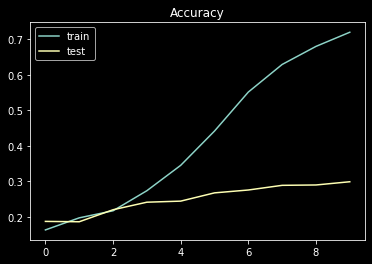

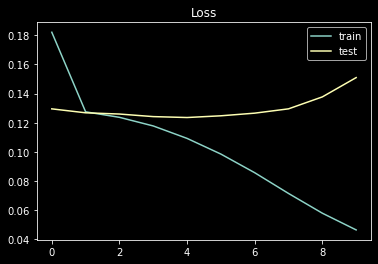

In [864]:
# Plotting Accuracy and val_accuracy
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show();

# Plotting loss and val_loss
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()